## A/B Testing Case Study – Website Conversion Analysis
# Author: Sanyam Garg

## 1. Overview
The goal of this A/B testing case study is to determine whether Variant B of a website leads to a higher conversion rate compared to Variant A.

Variant A (Control): Existing webpage design
Variant B (Treatment): New webpage design aimed at improving conversions

Objective: Evaluate whether Variant B provides a statistically significant improvement in conversion rate using hypothesis testing.

We will perform:
- Data cleaning
- Conversion rate analysis
- t-test / chi-square test
- Insight summary and business recommendation

In [2]:
# 2. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [3]:
# 3. Load Dataset

# Replace with your file path
df = pd.read_csv("/kaggle/input/ab-testing/ab_data.csv")

# Preview first 5 rows
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [5]:
df.columns



Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

In [6]:
# 4. Data Cleaning & Preparation

# Check for duplicates
duplicates = df.duplicated().sum()
print("Duplicate rows:", duplicates)

# Remove duplicates if any
df = df.drop_duplicates()

# Convert timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Check missing values
print("\nMissing values:")
print(df.isnull().sum())

# Ensure 'group' only contains 'control' and 'treatment'
print("\nGroup value counts:")
print(df['group'].value_counts())

# Ensure converted column is numeric (0/1)
df['converted'] = df['converted'].astype(int)

# Preview cleaned data
df.head()

Duplicate rows: 0

Missing values:
user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

Group value counts:
group
treatment    147276
control      147202
Name: count, dtype: int64


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [7]:
# 5. Basic Metrics (CTR, Conversion Rate)

# Conversion rate for each group
conversion_rates = df.groupby('group')['converted'].mean() * 100
conversion_counts = df.groupby('group')['converted'].sum()
group_sizes = df['group'].value_counts()

print("Group Sizes:\n", group_sizes)
print("\nTotal Conversions:\n", conversion_counts)
print("\nConversion Rates (%):\n", conversion_rates)

# Create a comparison table
summary_table = pd.DataFrame({
    'Total Users': group_sizes,
    'Converted Users': conversion_counts,
    'Conversion Rate (%)': conversion_rates
})

summary_table

Group Sizes:
 group
treatment    147276
control      147202
Name: count, dtype: int64

Total Conversions:
 group
control      17723
treatment    17514
Name: converted, dtype: int64

Conversion Rates (%):
 group
control      12.039918
treatment    11.891958
Name: converted, dtype: float64


,Total Users,Converted Users,Conversion Rate (%)
group,,,
control,147202,17723,12.039918
treatment,147276,17514,11.891958


In [8]:
# 6. Statistical Testing: Chi-Square Test

# Create contingency table
contingency_table = pd.crosstab(df['group'], df['converted'])
print("Contingency Table:\n", contingency_table)

# Perform Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("\nChi-Square Test Results")
print("Chi2 Statistic:", chi2)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)
print("\nExpected Frequencies:\n", expected)

Contingency Table:
 converted       0      1
group                   
control    129479  17723
treatment  129762  17514

Chi-Square Test Results
Chi2 Statistic: 1.5159618356336582
p-value: 0.2182316121631168
Degrees of Freedom: 1

Expected Frequencies:
 [[129587.92739016  17614.07260984]
 [129653.07260984  17622.92739016]]


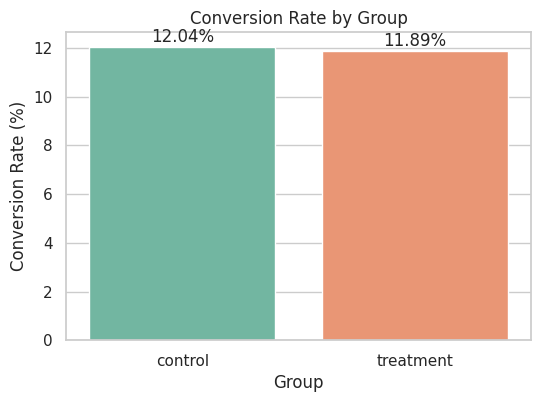

In [9]:
# Plot 1: Conversion Rate Comparison

conversion_rates = df.groupby('group')['converted'].mean() * 100

plt.figure(figsize=(6,4))
sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette="Set2")
plt.title("Conversion Rate by Group")
plt.ylabel("Conversion Rate (%)")
plt.xlabel("Group")

for i, rate in enumerate(conversion_rates.values):
    plt.text(i, rate + 0.2, f"{rate:.2f}%", ha='center')

plt.show()


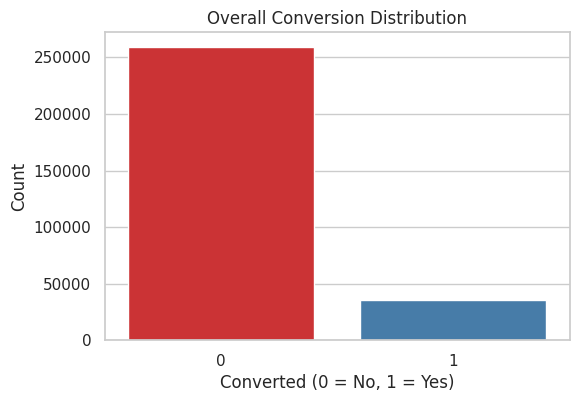

In [10]:
# Plot 2: Conversion Distribution

plt.figure(figsize=(6,4))
sns.countplot(x='converted', data=df, palette="Set1")
plt.title("Overall Conversion Distribution")
plt.xlabel("Converted (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


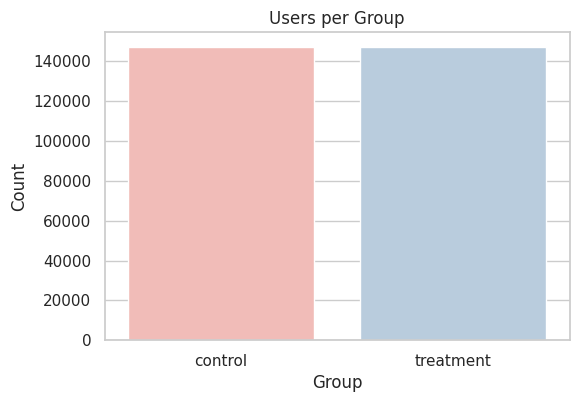

In [11]:
# Plot 3: Users per Group

plt.figure(figsize=(6,4))
sns.countplot(x='group', data=df, palette="Pastel1")
plt.title("Users per Group")
plt.xlabel("Group")
plt.ylabel("Count")
plt.show()


## Results & Interpretation

The chi-square test was conducted to determine whether the difference in conversion rates between Variant A (control) and Variant B (treatment) is statistically significant.

## Statistical Output

Chi-square statistic: 1.516

p-value: 0.218

Significance level (α): 0.05


## Interpretation

Because the p-value (0.218) is greater than 0.05, we fail to reject the null hypothesis.
This means:

The difference in conversion rates between A and B is not statistically significant.

Although Variant A has a higher conversion rate than Variant B, the difference may be due to random variation rather than a meaningful impact of the webpage design.


In other words, there is no strong statistical evidence that either version performs better.****


## Business Recommendation

Based on the A/B test analysis, Variant A (control) shows a slightly higher conversion rate compared to Variant B (treatment). However, the chi-square test indicates that this difference is not statistically significant (p = 0.218 > 0.05).

# Recommendation

Since neither variant demonstrates a statistically meaningful improvement, it is not advisable to switch to Variant B at this stage. The company should:

1. Continue using Variant A until further evidence suggests a better-performing alternative.


2. Collect more user data to increase statistical power and reduce uncertainty.


3. Consider revising Variant B and testing a new variation with improved design or messaging.


4. Conduct additional experiments such as:

Segment-based A/B testing (e.g., mobile vs desktop users)

## Multivariate testing

Funnel analysis to explore where users drop off




## Business Insight

The experiment highlights that data-informed decisions require statistical validation, not just raw conversion differences. Without significance, adopting Variant B could introduce unnecessary risk without proven benefit.
